# End to end Multi-class Dog Breed Classification

This notebook builds and end-to-end multi-class image classifier using TenserFlow 2.0 and TenserFlow Hub

## 1. Problem

- Identify the breed of a dog given an image of a dog.

## 2. Data

- Data from kaggle competition.
https://www.kaggle.com/competitions/dog-breed-identification

## 3. Evaluation

- The evaluation metric required is Multi class Log loss. For each image in test set, must predict probability for each of the different breeds.

## 4. Features

- Dealing with image (unstructured data) so we're using deep learning/transfer learning.
- There are 120 breeds of dogs i.e. 120 different classes.
- About 10,000+ images in the training set (train set image have labels)
- Around 10,000+ images in test set (no labels)

## Getting Workspace ready

* Import TensorFlow
* Import TensorFlow Hub
* Running on gpu

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
print("TF version: ", tf.__version__)
print("TF_hub version: ", hub.__version__)

TF version:  2.18.0
TF_hub version:  0.16.1


In [3]:
# Checking for GPU availability
print("GPU", "available (Yes Sir!!)" if tf.config.list_physical_devices("GPU") else "GPU not available sir")

GPU GPU not available sir


In [4]:
# Unzipping the data in google drive
# !unzip "drive/MyDrive/Dog_Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog_Vision/"

## Getting our data ready (Turning into Tensors)

With all ML models, our data has to be in numerical format. So turning our images into Tensors(numerical representation)

In [5]:
label_csv = pd.read_csv('drive/MyDrive/Dog_Vision/labels.csv')
print(label_csv.describe)

<bound method NDFrame.describe of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]>


In [6]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
label_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


The label contains name of dog breed of our training images

<Axes: xlabel='breed'>

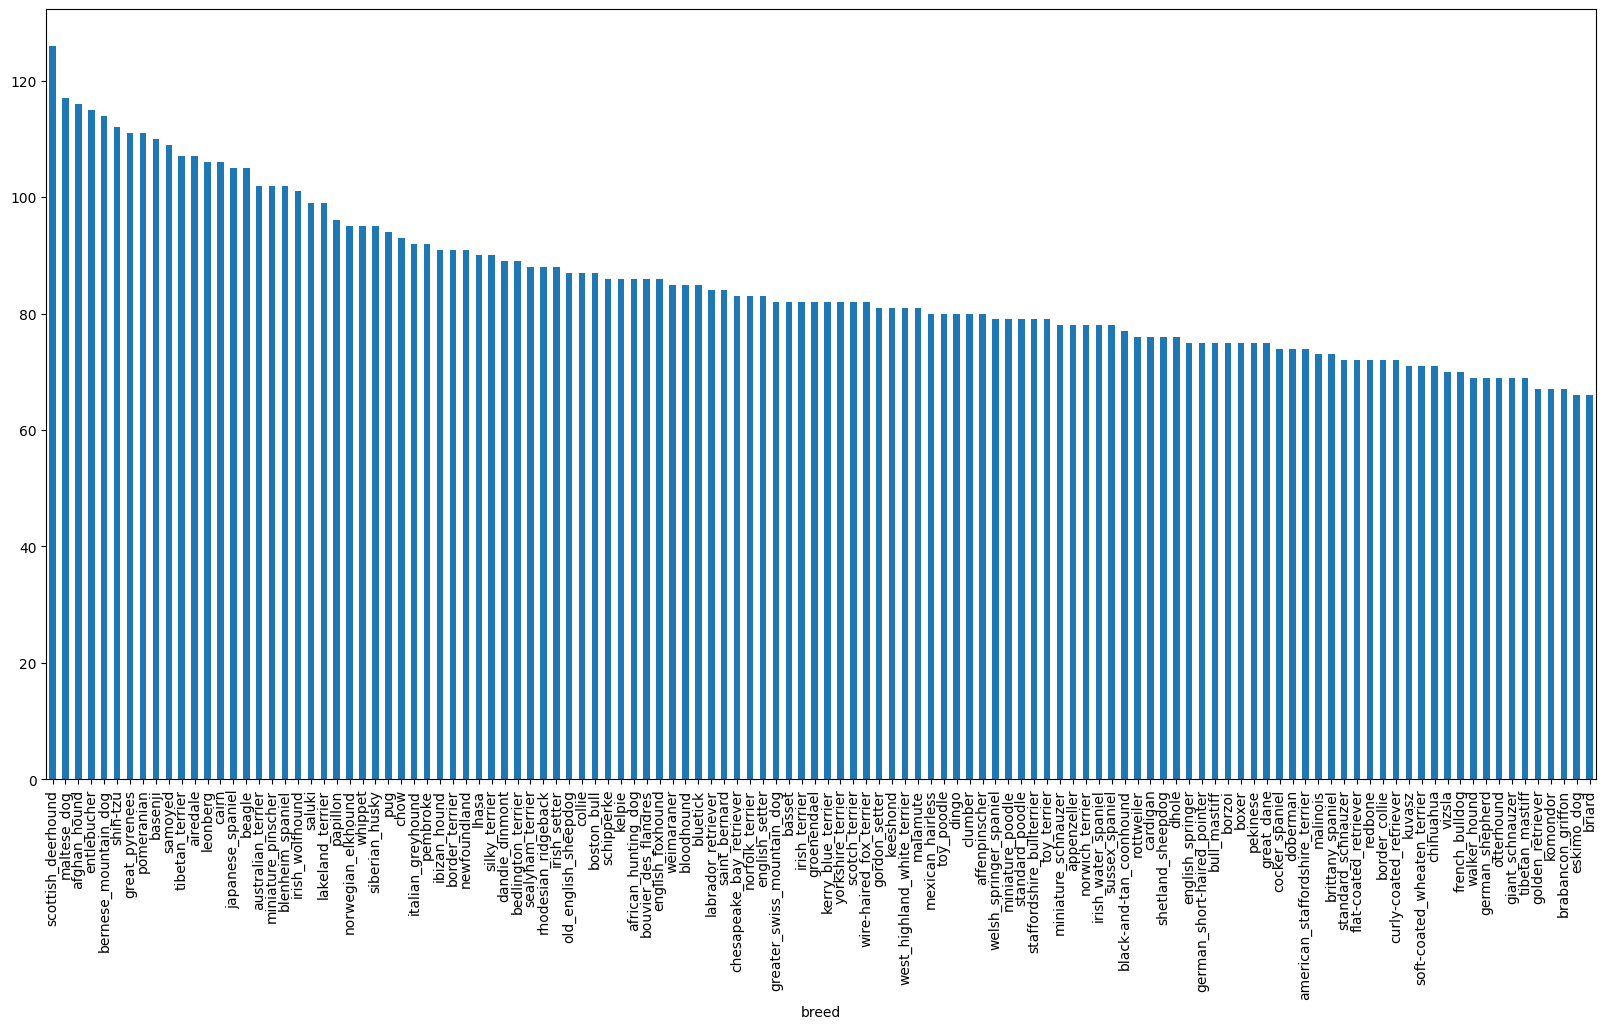

In [8]:
# How many images of each breeds
label_csv['breed'].value_counts().plot(kind='bar', x=label_csv['breed'], figsize=(20, 10))

There is enough image for all type of breed so that our model can identify them

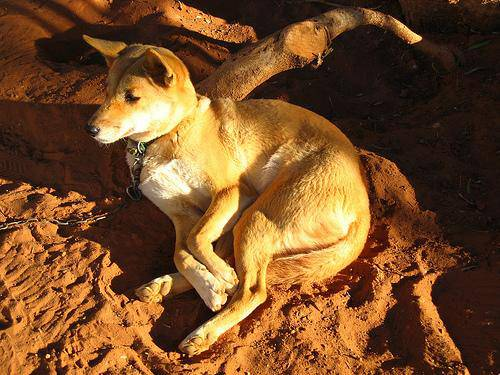

In [9]:
from IPython.display import Image
Image('drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

## Getting Images and their labels

In [10]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
# create pathnames from image ID's from label
filenames = ["drive/MyDrive/Dog_Vision/train/" + fname + ".jpg" for fname in label_csv['id']]
filenames[:10]

['drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
# checking no of files names matches with train set image files
import os
if len(os.listdir('drive/MyDrive/Dog_Vision/train/')) == len(filenames):
  print('Filenames match actual amount of files!!! Proceed.')
else:
  print("Filenames do not match actual amount of files, check the target directory")

Filenames match actual amount of files!!! Proceed.


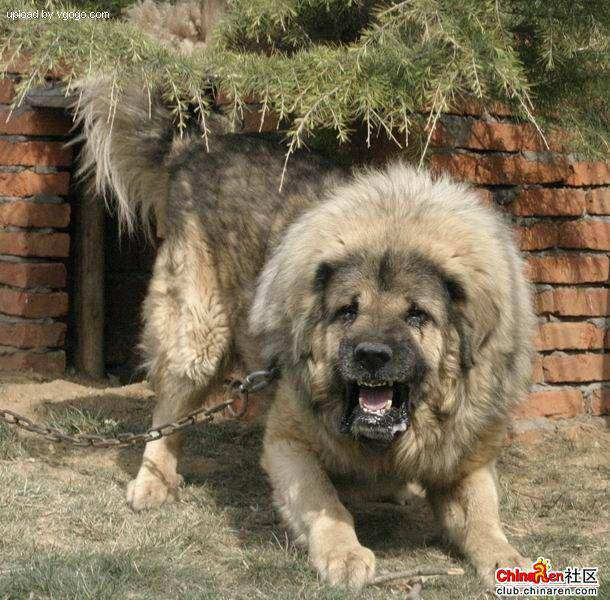

In [13]:
Image(filenames[9000])

Now that is a dog

In [14]:
print(filenames[9000])

drive/MyDrive/Dog_Vision/train/e20e32bf114141e20a1af854ca4d0ecc.jpg


In [15]:
label_csv[label_csv['id'] =="e20e32bf114141e20a1af854ca4d0ecc"]

,id,breed
9000,e20e32bf114141e20a1af854ca4d0ecc,tibetan_mastiff


In [16]:
labels = label_csv['breed']
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
len(labels)

10222

In [18]:
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels doesn't match number of filenames, check train directories")

Number of labels matches number of filenames!


In [19]:
# Finding unique label values
unique_breed = np.unique(labels)
len(unique_breed)

120

all the data requirements are satisfied as mentioned in kaggle

In [20]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breed for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

In [23]:
# Example: Turning boolean labels into integers
print(labels[0])  # original label
print(np.where(unique_breed == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


labels can now be converted into numerical values.

## Creating Validation set

In [24]:
# setup X & y varibales
X = filenames
y = boolean_labels

Experimenting wiht 1000 images and increase as needed.

In [25]:
# set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000}

In [26]:
# splitting our data into train and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [27]:
# Converting image to numpy array

from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

Here the tuple is height, width and color channel

In [28]:
image, image.max(), image.min() # values range from 0 to 255

(array([[[ 89, 137,  89],
         [ 76, 124,  76],
         [ 63, 111,  61],
         ...,
         [ 77, 133,  86],
         [ 76, 134,  86],
         [ 76, 134,  86]],
 
        [[ 72, 119,  75],
         [ 67, 114,  68],
         [ 63, 110,  64],
         ...,
         [ 75, 131,  84],
         [ 74, 132,  84],
         [ 74, 132,  84]],
 
        [[ 56, 104,  66],
         [ 58, 106,  68],
         [ 64, 112,  74],
         ...,
         [ 71, 127,  82],
         [ 73, 129,  84],
         [ 74, 130,  85]],
 
        ...,
 
        [[  2,  11,  10],
         [  5,  14,  11],
         [  8,  14,  14],
         ...,
         [120, 113,  67],
         [126, 118,  71],
         [122, 114,  67]],
 
        [[  0,   3,   7],
         [  2,   7,  10],
         [  3,   9,   7],
         ...,
         [105,  98,  54],
         [112, 104,  58],
         [111, 103,  57]],
 
        [[ 16,  18,  30],
         [ 16,  19,  24],
         [ 15,  20,  14],
         ...,
         [101,  92,  51],
  

In [29]:
# image into tensor
tf.constant(image)[:2] # this can run on gpu above array can't

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

Image as tensor looks like this


In [30]:
filenames[:2]

['drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg']

## Preprocessing Images (turning images into Tensors)

- Writing preprocess function that does:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to `image` variable
3. Turn our `image` (jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize all the `image` to be of same size
6. return the image

In [31]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """Takes image path and turns the image into Tensors"""
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensor with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3) # convets the string type into numpy array
  # normalization (convert the colour channel values from 0-255 to 0-1)
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to our desired value (244, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


## Turning our data into batches

In [32]:
# create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  '''Takes an image file path name and the associated label, process the image and returns a tuple of (image, label)'''
  image = process_image(image_path)
  return image, label

In [33]:
(process_image(X[12]), tf.constant(y[12]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.41515437, 0.19946808, 0.1720171 ],
         [0.37869743, 0.17085429, 0.13948174],
         [0.36193058, 0.15503281, 0.12334514],
         ...,
         [0.29701486, 0.10125153, 0.07380054],
         [0.29280463, 0.10064777, 0.07319678],
         [0.29280463, 0.10064777, 0.07319678]],
 
        [[0.40806067, 0.19237438, 0.1649234 ],
         [0.40548262, 0.19763945, 0.1662669 ],
         [0.37599018, 0.16909242, 0.13740474],
         ...,
         [0.28789535, 0.0939433 , 0.06649231],
         [0.28233546, 0.09017858, 0.06272759],
         [0.28233546, 0.09017858, 0.06272759]],
 
        [[0.4370794 , 0.22139311, 0.19394213],
         [0.43267584, 0.2248327 , 0.19346014],
         [0.39105853, 0.18416077, 0.15247308],
         ...,
         [0.28235295, 0.09019608, 0.0627451 ],
         [0.2784314 , 0.08627451, 0.05882353],
         [0.2784314 , 0.08627451, 0.05882353]],
 
        ...,
 
        [[0.14872189, 0.06765511

In [34]:
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """Create batches of data out of image (X) and label (y) pairs. Shuffles the training data but doesn't shuffle if it's validation data.Also accepst test data as input(nolabels)."""
  # for test dataset
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # data for valid dataset
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    # shuffling the data
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch



In [35]:
# creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [37]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Visualizing the data in batches

In [43]:
def show_25_images(images, labels):
  """Displays a plot of 25 images and their labels from data batch."""
  plt.figure(figsize=(10, 10))
  for i in range(25):
    # subplots of 5x5 for 25 images
    ax = plt.subplot(5, 5, i+1)
    # displaying image in each subplots
    plt.imshow(images[i])
    plt.title(unique_breed[labels[i].argmax()])
    plt.axis('off')


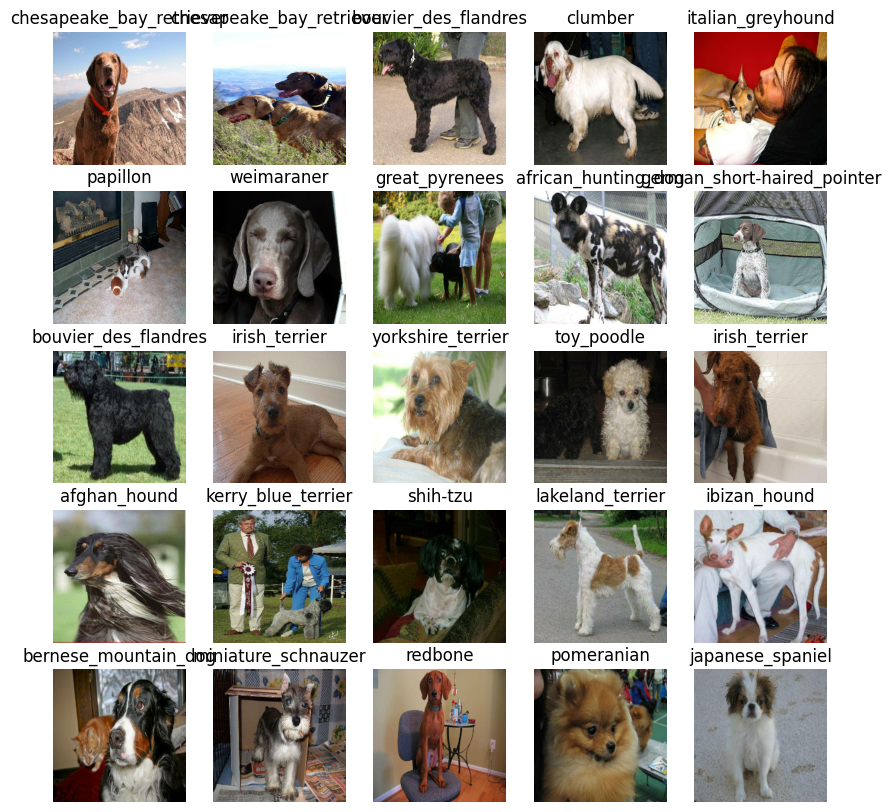

In [50]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

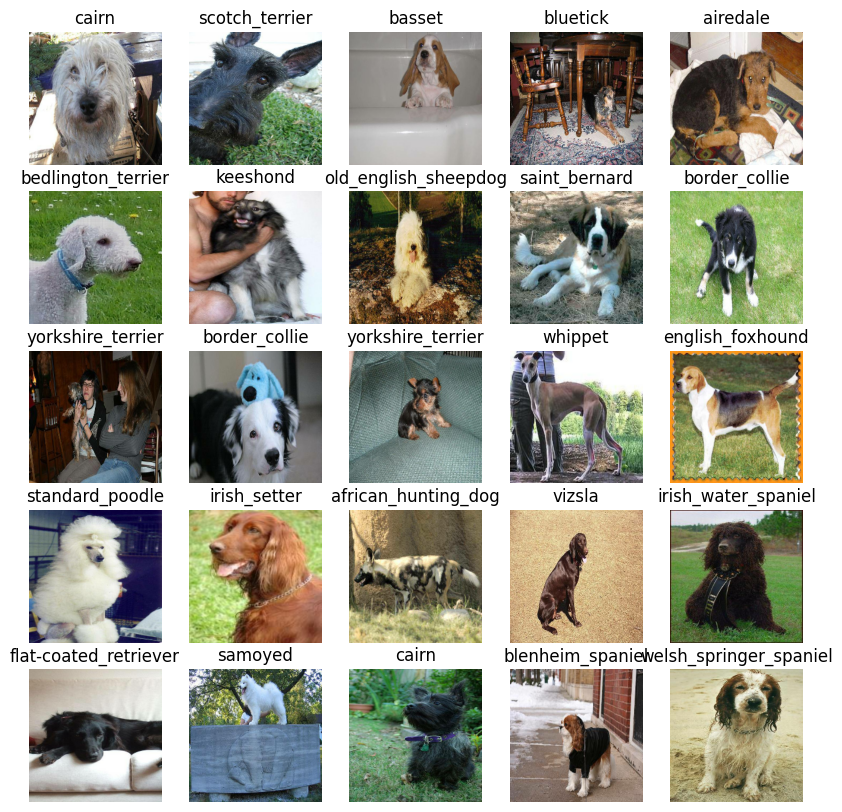

In [51]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)